## Regression
* Linear regression
    * Least Squares Regression
    * Linear Regression with GD
* Ridge regression
* Lasso regression
* Feature Importance

* Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).

### Ordinary Least Squares Regression
* The Ordinary Least Squares procedure seeks to minimize the sum of the squared residuals
* This is a Linear Algebra approach.This approach treats the data as a matrix and uses linear algebra operations to estimate the optimal values for the coefficients.

* Here the Objective function will be f(x)=m*x+c =y

In [53]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression

Coefficients :  [2.50084302] [-0.03965652]
Mean squared error:  0.026451517671107098


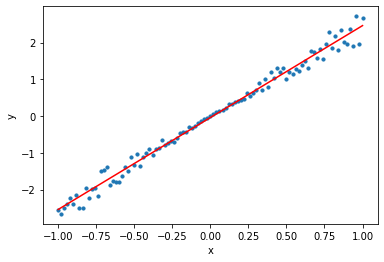

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# generate x and y
np.random.seed(0)
x = np.linspace(-1, 1, 101)
y=x*2 + x * np.random.random(len(x))

# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T


# turn y into a column vector
y = y[:, np.newaxis]

# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print("Coefficients : " ,alpha[0],alpha[1])

y_pred=alpha[0]*x+alpha[1]

# model evaluation
mse = mean_squared_error(y, y_pred)

# printing values
print('Mean squared error: ', mse)


# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_pred, color='r')
plt.show()

#### Implementation using sklearn library

Coefficients :  2.500843022017769 -0.03965651999902888
Mean squared error:  0.026451517671107084


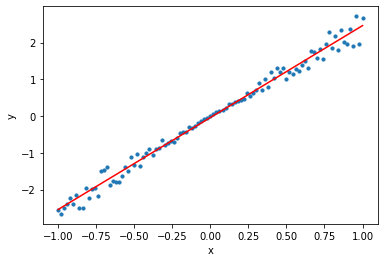

In [5]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# generate random data-set
np.random.seed(0)
x = np.linspace(-1, 1, 101)
# y=x**2 + x * np.random.random(len(x))
y=x*2 + x * np.random.random(len(x))
x=x.reshape(-1,1)

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
mse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print("Coefficients : ",regression_model.coef_[0],regression_model.intercept_)
# print('Slope:' ,regression_model.coef_)
# print('Intercept:', regression_model.intercept_)
print('Mean squared error: ', mse)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

#### LR on Multiple Variables

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd

# load the boston dataset
filename="housing.csv"
dataframe = pd.read_csv(filename, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]


# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X, y)

# regression coefficients
print('Coefficients: ', reg.coef_)

# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
# make a prediction
yhat = reg.predict([row])
# summarize prediction
print('\nPredicted: %.3f' % yhat)


Coefficients:  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]

Predicted: 30.004


### Gradient Descent
* In GD approach coefficients are updated in the direction towards minimizing the error.

Optimal Parameters :  2.5165452171367373 0.02458931744802798
Mean squared error:  0.032278984086038666


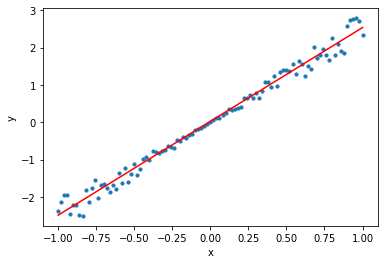

In [7]:
# Generating data
X = np.linspace(-1, 1, 101)
Y=X*2 + X * np.random.random(len(X))

# Initialization of Parameter(Weights)
m=0
c=0
# Learning Rate
L=0.01
epoches=1500
n=float(len(X))
#Updating Parameters 
for i in range(epoches):
    Y_pred=m*X+c
    D_m=(-2/n)*sum(X*(Y-Y_pred)) # Cost Function Paritial Derivative w.r.t m
    D_c=(-2/n)*sum(Y-Y_pred)   # Cost Function Paritial Derivative w.r.t c
    
    # Updating next Parameters
    m=m-L*D_m
    c=c-L*D_c
 

# Predicting using optimal parameters.     
y_pred=m*X+c  

# model evaluation
mse = mean_squared_error(Y, y_pred)

# printing values
print("Optimal Parameters : ",m,c)
print('Mean squared error: ', mse)

# Plot
plt.scatter(X, Y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(X, y_pred, color='r')
plt.show()

### Ridge regression
* Ridge Regression is an extension of linear regression that adds a regularization penalty to the loss function during training.This has the effect of shrinking the coefficients.

Slope: [2.35569971]
Intercept: 0.0395345512001949
 Mean squared error:  0.03260628890490449


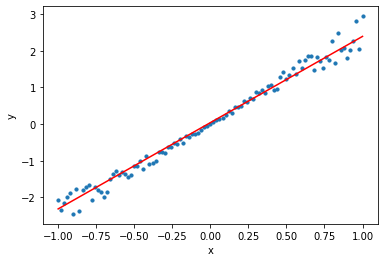

In [8]:
# make a prediction with a ridge regression model on the dataset
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


# generate x and y
x = np.linspace(-1, 1, 101)
y=x*2 + x * np.random.random(len(x))
x=x.reshape(-1,1)

# define model
model = Ridge(alpha=1.0)
# fit model
model.fit(x, y)

y_predicted = model.predict(x)

# model evaluation
mse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print(' Mean squared error: ', mse)


# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

In [60]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
filename="housing.csv"
dataframe = read_csv(filename, header=None)
# summarize shape
print(dataframe.shape)
# summarize first few lines
dataframe.head()

(506, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [61]:
# make a prediction with a ridge regression model on the dataset
from pandas import read_csv
from sklearn.linear_model import Ridge
# load the dataset
filename="housing.csv"
dataframe = read_csv(filename, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge(alpha=1.0)
# fit model
model.fit(X, y)
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 30.253


In [62]:
model.coef_

array([-1.04595278e-01,  4.74432243e-02, -8.80467889e-03,  2.55239322e+00,
       -1.07770146e+01,  3.85400020e+00, -5.41453810e-03, -1.37265353e+00,
        2.90141589e-01, -1.29116463e-02, -8.76074394e-01,  9.67327945e-03,
       -5.33343225e-01])

### LASSO 
* Lasso Regression is an extension of linear regression that adds a regularization penalty to the loss function during training.It is popular type of regularized linear regression that includes an L1 penalty.


Slope: [0.]
Intercept: 0.023405045282519438
Mean squared error:  0.026872534066281345


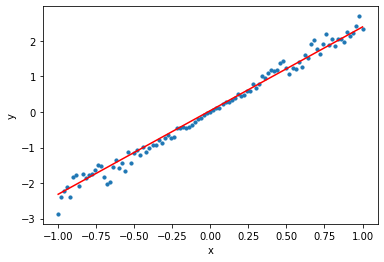

In [9]:
# make a prediction with a lasso regression model on the dataset
from sklearn.linear_model import Lasso
# Generating x and y
x = np.linspace(-1, 1, 101)
y=x*2 + x * np.random.random(len(x))
x=x.reshape(-1,1)

# define model
model = Lasso(alpha=1.0)
# fit model
model.fit(x, y)
# make a prediction
yhat = model.predict(x)
# model evaluation
mse = mean_squared_error(y, y_predicted)

# printing values
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error: ', mse)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

#### Example 2 : 

In [86]:
# make a prediction with a lasso regression model on the dataset
from pandas import read_csv
from sklearn.linear_model import Lasso
# load dataset
filename="housing.csv"
dataframe = read_csv(filename, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Lasso(alpha=1.0)
# fit model
model.fit(X, y)
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 30.998


In [87]:
model.coef_

array([-0.06343729,  0.04916467, -0.        ,  0.        , -0.        ,
        0.9498107 ,  0.02090951, -0.66879   ,  0.26420643, -0.01521159,
       -0.72296636,  0.00824703, -0.76111454])

### Feature Importance
### Linear Regression Feature Importance

* Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction.

* The scores are useful and can be used in a range of situations in a predictive modeling problem, such as:
    * Better understanding the data.
    * Better understanding a model.
    * Reducing the number of input features.

* Finding feature importance using linear regression.

#### Generating Synthetic Regression Data

In [70]:
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.00000


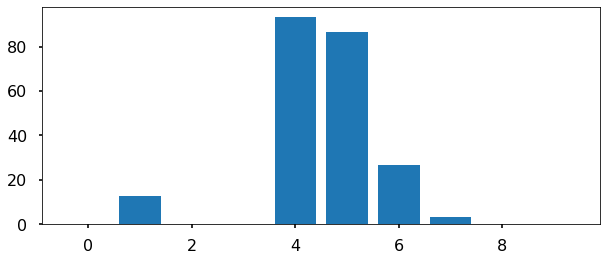

In [79]:
# linear regression feature importance
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.figure(figsize=(10,4))
plt.bar([x for x in range(len(importance))], importance)
plt.show()